In [1]:
# imports
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras import backend as K
import os
import numpy as np
from numpy.random import seed
import json
from collections import Counter
from keras.optimizers import SGD
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageFilter
import matplotlib.pyplot as plt
from IPython.display import Image as Image2
from IPython.display import display
from matplotlib.pyplot import imshow
import urllib
from google_images_download import google_images_download
from tensorflow import set_random_seed

working_path = 'd:/projects/python/tl_logos/'
os.chdir(working_path)

seed(1)
set_random_seed(2)

Using TensorFlow backend.


In [2]:
# get labels

pet_images_fn = [fn for fn in os.listdir() if fn.upper().endswith('.JPG')]
labels = []
idx_to_labels = []
label_to_idx = {}
for fn in pet_images_fn:
    label, _ = fn.rsplit('_', 1)
    if not label in label_to_idx:
        label_to_idx[label] = len(idx_to_labels)
        idx_to_labels.append(label)
    labels.append(label_to_idx[label])
len(idx_to_labels)

print('')
print('Number of images: ')
print(len(pet_images_fn))
print('')
print('Team logos used: ')
print([i for i in idx_to_labels])
print('')



Number of images: 
60

Team logos used: 
['Flyers', 'Lightning', 'Penguin']



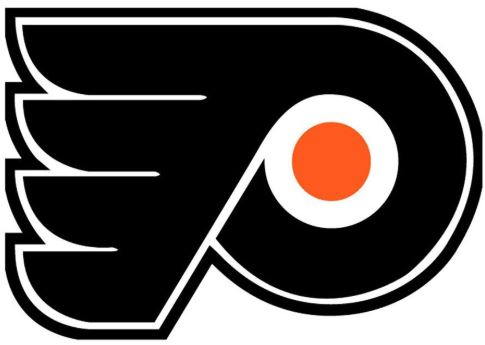

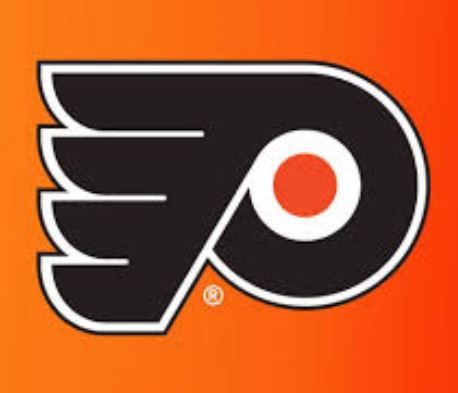

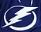

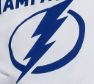

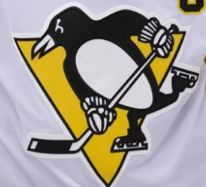

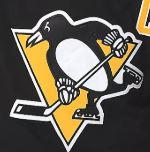

In [3]:
# view a few of the images

sample_pics = [1,2]
sample_list = []
for i in idx_to_labels: 
    for j in sample_pics:
        sample_list.append(str(i) + '_' + str(j) + '.JPG')
        
for pic in sample_list:
    display(Image2(pic, width = 150))

In [4]:
# loading images

images = [image.load_img(p, target_size=(299,299))
         for p in pet_images_fn]

tensor = np.array([image.img_to_array(img) for img in images])

In [5]:
# imports pre-trained system for image recognition
# trainable = False is import because we'll be using this system for features but not output
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# specify an additional layer for the new outputs (team logos)
pool_2d = GlobalAveragePooling2D(name='pool_2d')(base_model.output)
dense = Dense(1024, name='dense', activation='relu')(pool_2d)
predictions = Dense(len(idx_to_labels), activation='softmax')(dense)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
y = np.zeros((len(labels), len(idx_to_labels)))
for idx, label in enumerate(labels):
    y[idx][label] = 1

model.fit(
    tensor, y,
    batch_size=32,
    epochs=15,
    verbose=2
)

Epoch 1/15
 - 11s - loss: 2.6732 - acc: 0.4167
Epoch 2/15
 - 9s - loss: 7.5998 - acc: 0.4333
Epoch 3/15
 - 10s - loss: 7.2426 - acc: 0.3833
Epoch 4/15
 - 10s - loss: 5.3717 - acc: 0.6667
Epoch 5/15
 - 10s - loss: 5.2825 - acc: 0.6667
Epoch 6/15
 - 11s - loss: 0.4436 - acc: 0.8500
Epoch 7/15
 - 10s - loss: 2.5451 - acc: 0.5667
Epoch 8/15
 - 11s - loss: 3.2259 - acc: 0.5833
Epoch 9/15
 - 11s - loss: 0.8166 - acc: 0.7500
Epoch 10/15
 - 11s - loss: 0.0207 - acc: 1.0000
Epoch 11/15
 - 10s - loss: 0.0086 - acc: 1.0000
Epoch 12/15
 - 10s - loss: 0.0030 - acc: 1.0000
Epoch 13/15
 - 10s - loss: 0.0126 - acc: 1.0000
Epoch 14/15
 - 11s - loss: 0.0024 - acc: 1.0000
Epoch 15/15
 - 11s - loss: 0.0029 - acc: 1.0000


In [8]:
# alter network to unfreeze certain sections of the network

unfreeze = False
for layer in base_model.layers:
    if unfreeze:
        layer.trainable = True
    if layer.name == 'mixed9':
        unfreeze = True
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# check performance on modified network

model.fit(
    tensor, y,
    batch_size=32,
    epochs=10,
    verbose=2
)

Epoch 1/10
 - 13s - loss: 0.0025 - acc: 1.0000
Epoch 2/10
 - 11s - loss: 0.0031 - acc: 1.0000
Epoch 3/10
 - 12s - loss: 0.0018 - acc: 1.0000
Epoch 4/10
 - 12s - loss: 0.0051 - acc: 1.0000
Epoch 5/10
 - 11s - loss: 0.0060 - acc: 1.0000
Epoch 6/10
 - 12s - loss: 0.0031 - acc: 1.0000
Epoch 7/10
 - 12s - loss: 0.0085 - acc: 1.0000
Epoch 8/10
 - 12s - loss: 0.0043 - acc: 1.0000
Epoch 9/10
 - 11s - loss: 0.0202 - acc: 1.0000
Epoch 10/10
 - 12s - loss: 0.0079 - acc: 1.0000


In [10]:
# look at image sizes

pet_images_fn = [fn for fn in os.listdir() if fn.upper().endswith('.JPG')]
w_min = 1000
h_min = 1000
for i in range(1,len(pet_images_fn)):
    temp_img = Image.open(pet_images_fn[i])
    w, h = temp_img.size
    if w < w_min:
        w_min = w
    if h < h_min:
        h_min = h

print('\n Minimum image width: ' + str(w_min))
print('\n Minimum image height: ' + str(h_min) + '\n' )

pet_images_fn = [fn for fn in os.listdir() if fn.upper().endswith('.JPG')]
for pic in pet_images_fn: 
    temp_img = Image.open(pic)
    print(pic + ' ' + str(temp_img.size))

print('\n')


 Minimum image width: 41

 Minimum image height: 32

Flyers_1.JPG (485, 345)
Flyers_10.JPG (141, 96)
Flyers_11.JPG (111, 93)
Flyers_12.JPG (179, 145)
Flyers_13.JPG (211, 164)
Flyers_14.JPG (154, 111)
Flyers_15.JPG (186, 138)
Flyers_16.JPG (125, 89)
Flyers_17.JPG (178, 150)
Flyers_18.JPG (74, 53)
Flyers_19.JPG (48, 44)
Flyers_2.JPG (458, 393)
Flyers_20.JPG (169, 131)
Flyers_3.JPG (123, 97)
Flyers_4.JPG (111, 118)
Flyers_5.JPG (127, 97)
Flyers_6.JPG (124, 103)
Flyers_7.JPG (101, 113)
Flyers_8.JPG (108, 77)
Flyers_9.JPG (129, 112)
Lightning_1.JPG (41, 32)
Lightning_10.JPG (95, 134)
Lightning_11.JPG (144, 126)
Lightning_12.JPG (137, 118)
Lightning_13.JPG (108, 114)
Lightning_14.JPG (65, 53)
Lightning_15.JPG (96, 74)
Lightning_16.JPG (81, 74)
Lightning_17.JPG (65, 47)
Lightning_18.JPG (87, 85)
Lightning_19.JPG (76, 99)
Lightning_2.JPG (94, 84)
Lightning_20.JPG (62, 66)
Lightning_3.JPG (120, 91)
Lightning_4.JPG (120, 99)
Lightning_5.JPG (197, 172)
Lightning_6.JPG (83, 86)
Lightning_7.JPG (6

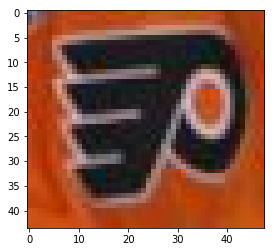

In [11]:
# check what will happen with image resize 

test_resize = Image.open('Flyers_19.JPG')
imshow(np.asarray(test_resize))

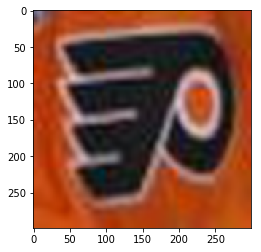

In [12]:
test_resize = test_resize.resize((299,299), Image.ANTIALIAS)
imshow(np.asarray(test_resize))
test_resize.close()

In [13]:
# resize all images

working_path = 'd:/projects/python/tl_logos/'
os.chdir(working_path)
         
pet_images_fn = [fn for fn in os.listdir() if fn.upper().endswith('.JPG')]
        
for i in range(0,60): 
    original_path = 'd:/projects/python/tl_logos/'
    os.chdir(original_path)
    image_name = pet_images_fn[i]
    temp_load = Image.open(image_name,'r')
    temp_load = temp_load.resize( (299,299), Image.ANTIALIAS )
    temp_load = temp_load.convert('L') # converts to monochrome
    temp_load = temp_load.convert('1') # converts to black and white
    resize_path = 'd:/projects/python/tl_logos/resized/'
    os.chdir(resize_path)
    temp_load.save(image_name, temp_load.format)
    temp_load.close()
    
resize_path = 'd:/projects/python/tl_logos/resized/'
os.chdir(resize_path)
         
pet_images_rs = [fn for fn in os.listdir() if fn.upper().endswith('.JPG')]
         
org_img_count = len(pet_images_fn)
rs_img_count = len(pet_images_rs)

print('\n Original Images: ' + str(org_img_count) + '\n Resized Images: ' + str(rs_img_count))



 Original Images: 60
 Resized Images: 60


In [14]:
# check the resizes

working_path = 'd:/projects/python/tl_logos/resized/'
os.chdir(working_path)

pet_images_fn = [fn for fn in os.listdir() if fn.endswith('.JPG')]
w_min = 1000
h_min = 1000
for i in range(1,len(pet_images_fn)):
    temp_img = Image.open(pet_images_fn[i])
    w, h = temp_img.size
    if w < w_min:
        w_min = w
    if h < h_min:
        h_min = h
    
print('\n Minimum image width: ' + str(w_min))
print('\n Minimum image height: ' + str(h_min) + '\n' )

pet_images_fn = [fn for fn in os.listdir() if fn.endswith('.JPG')]
for pic in pet_images_fn: 
    temp_img = Image.open(pic)
    print(pic + ' ' + str(temp_img.size))

print('\n')


 Minimum image width: 299

 Minimum image height: 299

Flyers_1.JPG (299, 299)
Flyers_10.JPG (299, 299)
Flyers_11.JPG (299, 299)
Flyers_12.JPG (299, 299)
Flyers_13.JPG (299, 299)
Flyers_14.JPG (299, 299)
Flyers_15.JPG (299, 299)
Flyers_16.JPG (299, 299)
Flyers_17.JPG (299, 299)
Flyers_18.JPG (299, 299)
Flyers_19.JPG (299, 299)
Flyers_2.JPG (299, 299)
Flyers_20.JPG (299, 299)
Flyers_3.JPG (299, 299)
Flyers_4.JPG (299, 299)
Flyers_5.JPG (299, 299)
Flyers_6.JPG (299, 299)
Flyers_7.JPG (299, 299)
Flyers_8.JPG (299, 299)
Flyers_9.JPG (299, 299)
Lightning_1.JPG (299, 299)
Lightning_10.JPG (299, 299)
Lightning_11.JPG (299, 299)
Lightning_12.JPG (299, 299)
Lightning_13.JPG (299, 299)
Lightning_14.JPG (299, 299)
Lightning_15.JPG (299, 299)
Lightning_16.JPG (299, 299)
Lightning_17.JPG (299, 299)
Lightning_18.JPG (299, 299)
Lightning_19.JPG (299, 299)
Lightning_2.JPG (299, 299)
Lightning_20.JPG (299, 299)
Lightning_3.JPG (299, 299)
Lightning_4.JPG (299, 299)
Lightning_5.JPG (299, 299)
Lightning_

In [15]:
# loading images

working_path = 'd:/projects/python/tl_logos/resized/'
os.chdir(working_path)

images = [image.load_img(p, target_size=(299,299))
         for p in pet_images_rs]

tensor = np.array([image.img_to_array(img) for img in images])

In [16]:
# reload original model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers:
    layer.trainable = False
    

pool_2d = GlobalAveragePooling2D(name='pool_2d')(base_model.output)
dense = Dense(1024, name='dense', activation='relu')(pool_2d)
predictions = Dense(len(idx_to_labels), activation='softmax')(dense)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# run to check performance

y = np.zeros((len(labels), len(idx_to_labels)))
for idx, label in enumerate(labels):
    y[idx][label] = 1

model.fit(
    tensor, y,
    batch_size=32,
    epochs=15,
    verbose=2
)

Epoch 1/15
 - 11s - loss: 5.6714 - acc: 0.2667
Epoch 2/15
 - 10s - loss: 10.8239 - acc: 0.2333
Epoch 3/15
 - 11s - loss: 8.9425 - acc: 0.3333
Epoch 4/15
 - 11s - loss: 3.2415 - acc: 0.5667
Epoch 5/15
 - 10s - loss: 0.7558 - acc: 0.6833
Epoch 6/15
 - 11s - loss: 1.0913 - acc: 0.7667
Epoch 7/15
 - 10s - loss: 0.1395 - acc: 0.9667
Epoch 8/15
 - 10s - loss: 0.1940 - acc: 0.9167
Epoch 9/15
 - 11s - loss: 0.1840 - acc: 0.9333
Epoch 10/15
 - 10s - loss: 0.9137 - acc: 0.7333
Epoch 11/15
 - 10s - loss: 0.1207 - acc: 0.9667
Epoch 12/15
 - 11s - loss: 0.0505 - acc: 1.0000
Epoch 13/15
 - 10s - loss: 0.0233 - acc: 1.0000
Epoch 14/15
 - 11s - loss: 0.0466 - acc: 1.0000
Epoch 15/15
 - 11s - loss: 0.0718 - acc: 1.0000


In [18]:
# unfreeze again to see if this helps

unfreeze = False
for layer in base_model.layers:
    if unfreeze:
        layer.trainable = True
    if layer.name == 'mixed9':
        unfreeze = True
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# run to check performance

y = np.zeros((len(labels), len(idx_to_labels)))
for idx, label in enumerate(labels):
    y[idx][label] = 1

model.fit(
    tensor, y,
    batch_size=32,
    epochs=10,
    verbose=2
)

Epoch 1/10
 - 14s - loss: 0.0289 - acc: 1.0000
Epoch 2/10
 - 12s - loss: 0.0615 - acc: 1.0000
Epoch 3/10
 - 12s - loss: 0.0632 - acc: 0.9667
Epoch 4/10
 - 12s - loss: 0.0292 - acc: 1.0000
Epoch 5/10
 - 12s - loss: 0.0787 - acc: 0.9833
Epoch 6/10
 - 11s - loss: 0.0515 - acc: 0.9833
Epoch 7/10
 - 12s - loss: 0.0331 - acc: 1.0000
Epoch 8/10
 - 12s - loss: 0.0447 - acc: 1.0000
Epoch 9/10
 - 12s - loss: 0.0352 - acc: 1.0000
Epoch 10/10
 - 11s - loss: 0.0280 - acc: 1.0000


In [20]:
# get some images from Google on 2018 F150, Prius, and Corvette

######### commented out, as once this ran, I don't need to gather again.

#os.chdir('d:/projects/python/tl_logos/vehicles/')

#response = google_images_download.googleimagesdownload()

#arguments = {"keywords":"2018 f150, 2018 prius, 2018 corvette"
#             ,"limit":200
#             ,"print_urls":True
#             ,"Type":"photo"
#             ,"format":"jpg"
#            ,"chromedriver":"C:/Program Files (x86)/Google/Chrome/Application/chromedriver.exe" }
#paths = response.download(arguments)

In [21]:
# rename files imported to create consistent conventions

os.chdir('d:/projects/python/tl_logos/vehicles/downloads/ 2018 corvette/')
corvette_org = [n for n in os.listdir() if n.upper().endswith('.JPG')]

os.chdir('d:/projects/python/tl_logos/vehicles/downloads/ 2018 prius/')
prius_org = [n for n in os.listdir() if n.upper().endswith('.JPG')]

os.chdir('d:/projects/python/tl_logos/vehicles/downloads/2018 f150/')
f150_org = [n for n in os.listdir() if n.upper().endswith('.JPG')]

org_path = 'd:/projects/python/tl_logos/vehicles/'

for i in range(0,len(corvette_org)):
    new_name = org_path +'Corvette_' + str(i) +'.JPG'
    org_file = org_path + 'downloads/ 2018 corvette/' + corvette_org[i]
    os.rename(org_file, new_name)
    
for i in range(0,len(prius_org)):
    new_name = org_path +'Prius_' + str(i) +'.JPG'
    org_file = org_path + 'downloads/ 2018 prius/' + prius_org[i]
    os.rename(org_file, new_name)
    
for i in range(0,len(f150_org)):
    new_name = org_path +'F150_' + str(i) +'.JPG'
    org_file = org_path + 'downloads/2018 f150/' + f150_org[i]
    os.rename(org_file, new_name)

In [22]:
# resize all images

working_path = 'd:/projects/python/tl_logos/vehicles/'
os.chdir(working_path)
         
car_list = [fn for fn in os.listdir() if fn.upper().endswith('.JPG')]

print('Not all images that were retrieved were viable. \nTherefore, the number of images is less than 600.')
print('Number of images being standardized: ' + str(len(car_list)))

original_path = 'd:/projects/python/tl_logos/vehicles/'
resize_path = 'd:/projects/python/tl_logos/vehicles/resized/'
resize_fail_count = 0
resize_fails = []

for i in range(0,len(car_list)):     
    os.chdir(original_path)
    image_name = car_list[i]
    try: 
        temp_load = Image.open(image_name,'r')
        temp_load = temp_load.resize( (299,299), Image.ANTIALIAS )
        temp_load = temp_load.convert('L') # converts to monochrome
        temp_load = temp_load.convert('1') # converts to black and white
        os.chdir(resize_path)
        temp_load.save(image_name, temp_load.format)
        temp_load.close()
    except IOError:
        resize_fail_count += 1
        resize_fails.append(image_name)

resize_path = 'd:/projects/python/tl_logos/vehicles/resized/'
os.chdir(resize_path)
      
print('Number of failures during standarization: ' + str(resize_fail_count))
      
car_list_new = [fn for fn in os.listdir() if fn.endswith('.jpg')]
         
print('Images successfully standardized: ' + str(len(car_list_new)))


Not all images that were retrieved were viable. 
Therefore, the number of images is less than 600.
Number of images being standardized: 574


C:\Users\ocamp\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\PIL\Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


Number of failures during standarization: 79
Images successfully standardized: 495


In [23]:
# loading images

working_path = 'd:/projects/python/tl_logos/vehicles/resized/'
os.chdir(working_path)

cars = [image.load_img(c, target_size=(299,299))
         for c in car_list_new]

tensor = np.array([image.img_to_array(img) for img in cars])

In [24]:
# make labels

car_labels = []
car_idx_to_labels = []
car_label_to_idx = {}
for fn in car_list_new:
    label, _ = fn.rsplit('_', 1)
    if not label in car_label_to_idx:
        car_label_to_idx[label] = len(car_idx_to_labels)
        car_idx_to_labels.append(label)
    car_labels.append(car_label_to_idx[label])
len(car_idx_to_labels)

3

In [25]:
# run to check performance

y = np.zeros((len(car_labels), len(car_idx_to_labels)))
for idx, label in enumerate(car_labels):
    y[idx][label] = 1

model.fit(
    tensor, y,
    batch_size=32,
    epochs=15,
    verbose=2
)

Epoch 1/15
 - 94s - loss: 1.7767 - acc: 0.2949
Epoch 2/15
 - 95s - loss: 1.3688 - acc: 0.3455
Epoch 3/15
 - 98s - loss: 1.1519 - acc: 0.4465
Epoch 4/15
 - 95s - loss: 0.9618 - acc: 0.5556
Epoch 5/15
 - 98s - loss: 0.8708 - acc: 0.6141
Epoch 6/15
 - 96s - loss: 0.7912 - acc: 0.6646
Epoch 7/15
 - 95s - loss: 0.7304 - acc: 0.6869
Epoch 8/15
 - 97s - loss: 0.6539 - acc: 0.7232
Epoch 9/15
 - 102s - loss: 0.6038 - acc: 0.7475
Epoch 10/15
 - 97s - loss: 0.5598 - acc: 0.7798
Epoch 11/15
 - 95s - loss: 0.5246 - acc: 0.7960
Epoch 12/15
 - 95s - loss: 0.4928 - acc: 0.8121
Epoch 13/15
 - 96s - loss: 0.4732 - acc: 0.8263
Epoch 14/15
 - 96s - loss: 0.4394 - acc: 0.8566
Epoch 15/15
 - 95s - loss: 0.4146 - acc: 0.8646


In [26]:
# again, unfreeze part of the network to see if we see a boost in performance

unfreeze = False
for layer in base_model.layers:
    if unfreeze:
        layer.trainable = True
    if layer.name == 'mixed9':
        unfreeze = True
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# run to check performance

y = np.zeros((len(car_labels), len(car_idx_to_labels)))
for idx, label in enumerate(car_labels):
    y[idx][label] = 1

model.fit(
    tensor, y,
    batch_size=32,
    epochs=15,
    verbose=2
)

Epoch 1/15
 - 97s - loss: 0.3998 - acc: 0.8828
Epoch 2/15
 - 96s - loss: 0.3814 - acc: 0.8828
Epoch 3/15
 - 97s - loss: 0.3829 - acc: 0.8869
Epoch 4/15
 - 97s - loss: 0.3362 - acc: 0.9091
Epoch 5/15
 - 97s - loss: 0.3202 - acc: 0.9172
Epoch 6/15
 - 95s - loss: 0.3296 - acc: 0.8889
Epoch 7/15
 - 96s - loss: 0.2951 - acc: 0.9232
Epoch 8/15
 - 97s - loss: 0.2844 - acc: 0.9354
Epoch 9/15
 - 95s - loss: 0.2810 - acc: 0.9253
Epoch 10/15
 - 95s - loss: 0.2570 - acc: 0.9455
Epoch 11/15
 - 95s - loss: 0.2441 - acc: 0.9556
Epoch 12/15
 - 96s - loss: 0.2653 - acc: 0.9354
Epoch 13/15
 - 98s - loss: 0.2583 - acc: 0.9374
Epoch 14/15
 - 95s - loss: 0.2313 - acc: 0.9475
Epoch 15/15
 - 95s - loss: 0.2003 - acc: 0.9677


In [28]:
# save the model

model.save('d:/projects/python/TL_logos/IRTL.h5')

In [29]:
# process a few testing images

os.chdir('d:/projects/python/tl_logos/vehicles/testing/')

test_list = [fn for fn in os.listdir() if fn.upper().endswith('.JPG')]

print('Number of vehicles to test: ' + str(len(test_list)))

original_path = 'd:/projects/python/tl_logos/vehicles/testing/'
resize_path = 'd:/projects/python/tl_logos/vehicles/testing/resized'

resize_fail_count = []
resize_fails = []

for i in range(0,len(test_list)):     
    os.chdir(original_path)
    image_name = test_list[i]
    try: 
        temp_load = Image.open(image_name,'r')
        temp_load = temp_load.resize( (299,299), Image.ANTIALIAS )
        temp_load = temp_load.convert('L') # converts to monochrome
        temp_load = temp_load.convert('1') # converts to black and white
        os.chdir(resize_path)
        temp_load.save(image_name, temp_load.format)
        temp_load.close()
    except IOError:
        resize_fail_count += 1
        resize_fails.append(image_name)

Number of vehicles to test: 9


In [30]:
# loading images

working_path = 'd:/projects/python/tl_logos/vehicles/testing/resized/'
os.chdir(working_path)

test_cars = [image.load_img(c, target_size=(299,299))
         for c in test_list]

test_tensor = np.array([image.img_to_array(img) for img in test_cars])

In [34]:
# get predictions on testing images

test_predictions = model.predict(test_tensor, batch_size=32, verbose=1)

9/9 [==============================] - 3s 283ms/step


In [35]:
print(test_predictions)

[[1.13400102e-10 1.38330875e-11 1.00000000e+00]
 [3.73363042e-11 6.39804292e-21 1.00000000e+00]
 [3.61382001e-11 6.89992508e-12 1.00000000e+00]
 [2.72623285e-10 3.14165971e-10 1.00000000e+00]
 [6.25443727e-06 4.38366570e-08 9.99993682e-01]
 [1.54951929e-09 9.96281087e-01 3.71885928e-03]
 [2.76810788e-05 6.52818077e-11 9.99972343e-01]
 [2.07618367e-08 3.93871654e-12 1.00000000e+00]
 [5.24019764e-04 2.73637143e-05 9.99448597e-01]]


In [36]:
test_predictions.shape

(9, 3)

In [38]:
os.listdir()

['CORVETTETEST_1.JPG',
 'CORVETTETEST_2.JPG',
 'CORVETTETEST_3.JPG',
 'F150TEST_1.jpg',
 'F150TEST_2.jpg',
 'F150TEST_3.jpg',
 'PRIUSTEST_1.JPG',
 'PRIUSTEST_2.JPG',
 'PRIUSTEST_3.JPG']

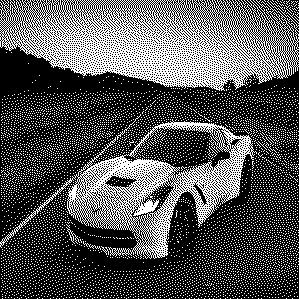

CORVETTETEST_1.JPG
Predicted to be a Prius


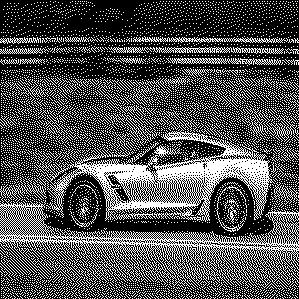

CORVETTETEST_2.JPG
Predicted to be a Prius


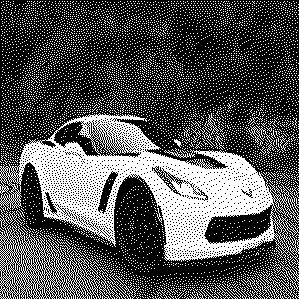

CORVETTETEST_3.JPG
Predicted to be a Prius


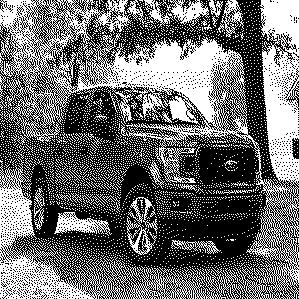

F150TEST_1.jpg
Predicted to be a Prius


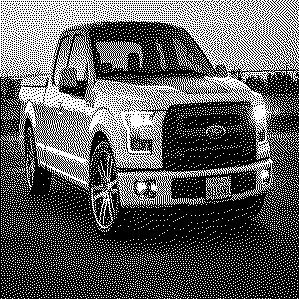

F150TEST_2.jpg
Predicted to be a Prius


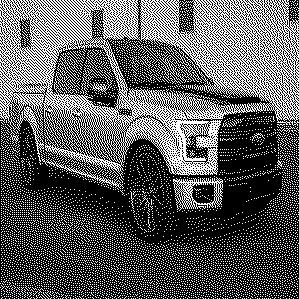

F150TEST_3.jpg
Predicted to be a F150


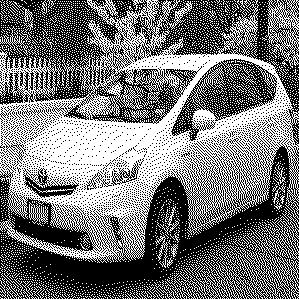

PRIUSTEST_1.JPG
Predicted to be a Prius


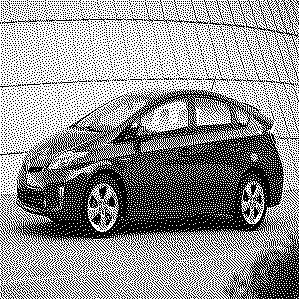

PRIUSTEST_2.JPG
Predicted to be a Prius


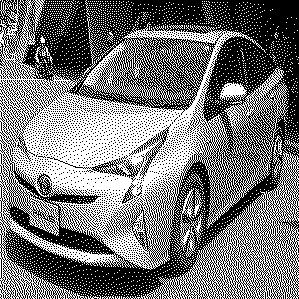

PRIUSTEST_3.JPG
Predicted to be a Prius

Final predicted performance is 44%, or 4-of-9.
It appears that, due to resizing, the distortion caused the vehicles to look very similar.
Turns out that compressed vehicles look like a Prius.
It looks like for the one F150 that it got correct, it was able to see the truck bed more clearly.
A future enhancement will be to:
(1) have a more standard layout for the car photo.
(2) crop the photo to a square.
(3) then resize the photo to the input size for the system.


In [49]:
# see output

for i in range(0,9):
    display(Image2(test_list[i], width = 150))
    print(test_list[i])
    if test_predictions[i,0] > test_predictions[i,1] and test_predictions[i,0] > test_predictions[i,2]:
        print('Predicted to be a Corvette')
    if test_predictions[i,1] > test_predictions[i,0] and test_predictions[i,1] > test_predictions[i,2]:
        print('Predicted to be a F150')
    if test_predictions[i,2] > test_predictions[i,0] and test_predictions[i,2] > test_predictions[i,1]:
        print('Predicted to be a Prius')
    

print('\nFinal predicted performance is 44%, or 4-of-9.')
print('It appears that, due to resizing, the distortion caused the vehicles to look very similar.')
print('Turns out that compressed vehicles look like a Prius.')
print('It looks like for the one F150 that it got correct, it was able to see the truck bed more clearly.')
print('A future enhancement will be to:')
print('(1) have a more standard layout for the car photo.')
print('(2) crop the photo to a square.')
print('(3) then resize the photo to the input size for the system.')

